In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df = pd.read_csv('StudentsPerformance.csv')#Reading the data

In [3]:
df #Lets see how our data looks like

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<h3>We have 1000 rows and 9 columns out of which 3 are int type and rest are of object type</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>So our data frame contain only Non NULL Values</h3>

# visualizations

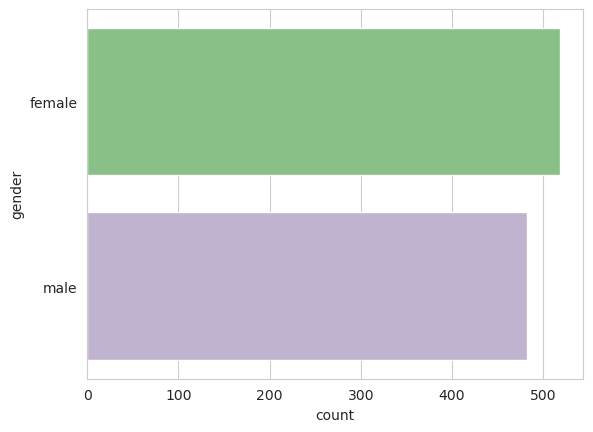

In [5]:
sns.set_style('whitegrid')
sns.countplot(y='gender',data=df,palette='Accent')
plt.show()

In [6]:
female_count = len(df[df['gender']=='female'])
male_count = 1000 - female_count
print("female count is:",female_count,"\n","male count is:",male_count)

female count is: 518 
 male count is: 482


<h3>Out of 1000 student, 518 are female and 482 are male so our data frame has almost same-gender count with the females slightly more</h3>

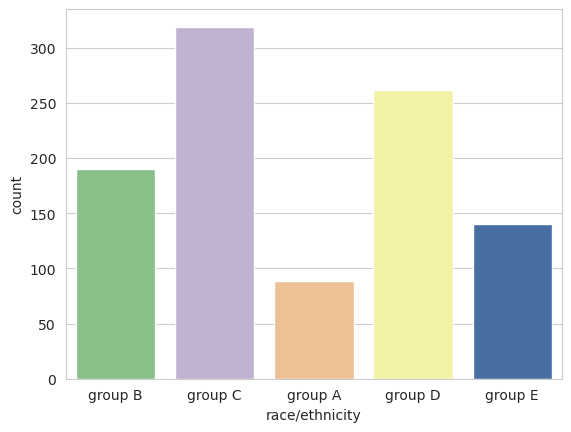

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='race/ethnicity',data=df,palette='Accent')
plt.show()

<h3>Our data frame consists of 5 race group out of which group C are in the majority and group A is in the minority</h3>

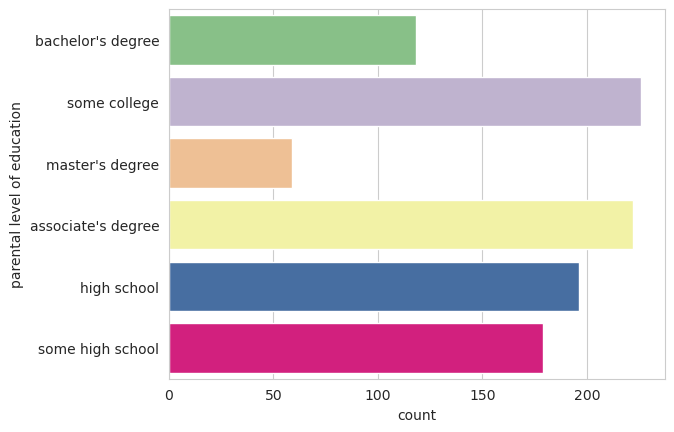

In [8]:
sns.set_style('whitegrid')
sns.countplot(y='parental level of education',data=df,palette='Accent')
plt.show()

<h3>Most of the student's parents went to some college or have an associate's degree few have a bachelor or a masters degree</h3>

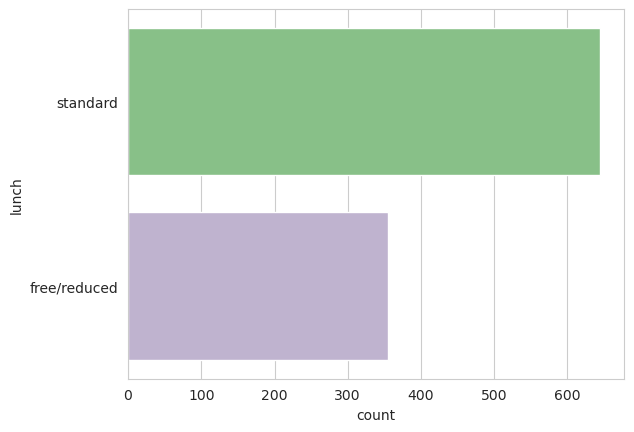

In [9]:
sns.set_style('whitegrid')
sns.countplot(y='lunch',data=df,palette='Accent')
plt.show()

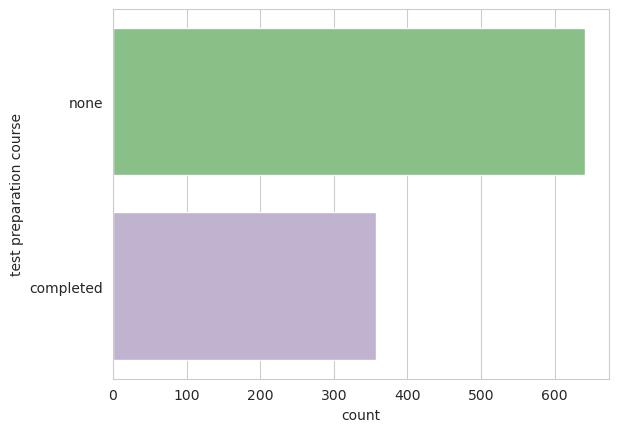

In [10]:
sns.set_style('whitegrid')
sns.countplot(y='test preparation course',data=df,palette='Accent')
plt.show()

<h3>Most student didn't prepared for the test </h3>

<h3>Let's find if there is a relationship between student score in different subjects</h3>

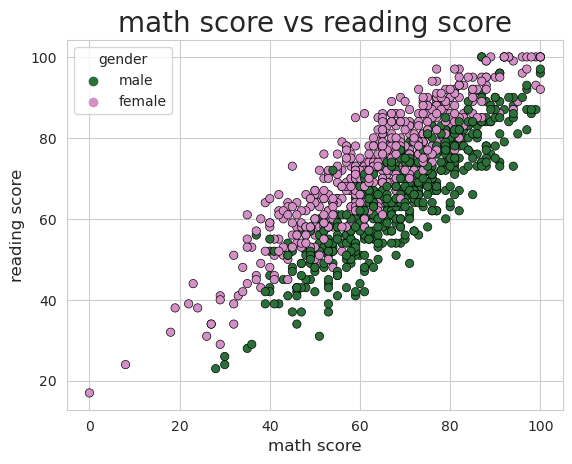

In [11]:
sns.set_style('whitegrid')
plt.title('math score vs reading score',size=20)
plt.xlabel('math score',size=12)
plt.ylabel('reading score',size=12)
sns.scatterplot(x='math score',y='reading score',data =df,hue='gender',edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

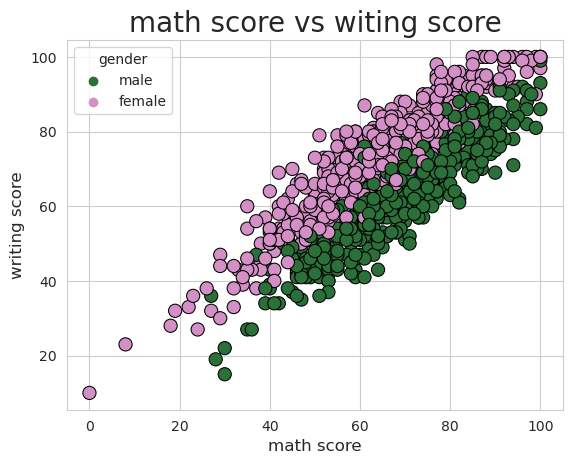

In [12]:
sns.set_style('whitegrid')
plt.title('math score vs witing score',size=20)
plt.xlabel('math score',size=12)
plt.ylabel('writing score',size=12)
sns.scatterplot(x='math score',y='writing score',data =df,hue='gender',s=90,edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

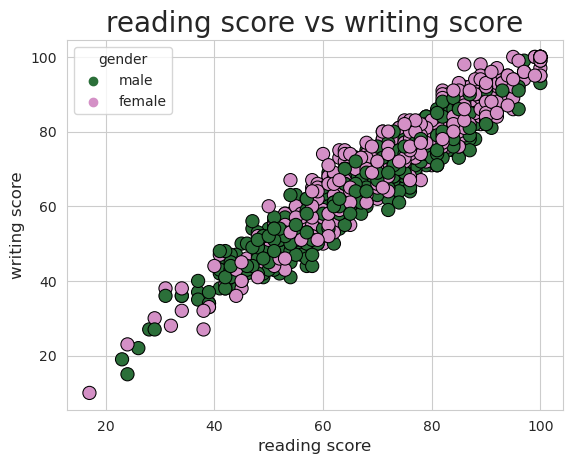

In [13]:
sns.set_style('whitegrid')
plt.title('reading score vs writing score',size=20)
plt.xlabel('reading score',size=12)
plt.ylabel('writing score',size=12)
sns.scatterplot(x='reading score',y='writing score',data =df,hue='gender',s=90,edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

<H3>Student score in math vs (reading and writing) are little spread out but they generally follow an uptrend so if a student score more in math he/she will also generally score more in other subjects. While scores in reading vs writing are more linear.</H3>

In [14]:
total_marks = ((df['math score'] + df['reading score'] + df['writing score'])/300)*100 #total marks are score of all subjects out of 100
df['total_marks'] = total_marks
kde_df = df[['math score','reading score','writing score','total_marks']]

<H1>Let's find out how other features affect total marks</H1>

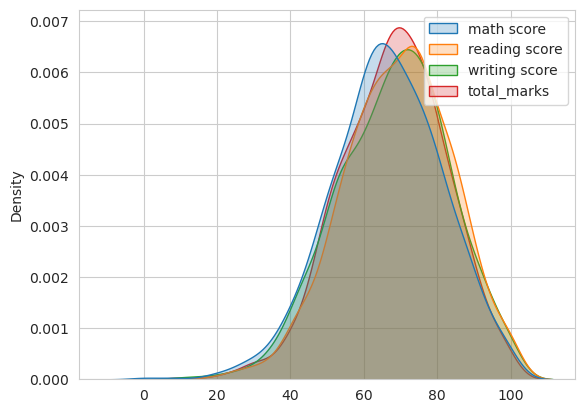

In [15]:
sns.set_style("whitegrid")
sns.kdeplot(data=kde_df,shade=True)
plt.show()

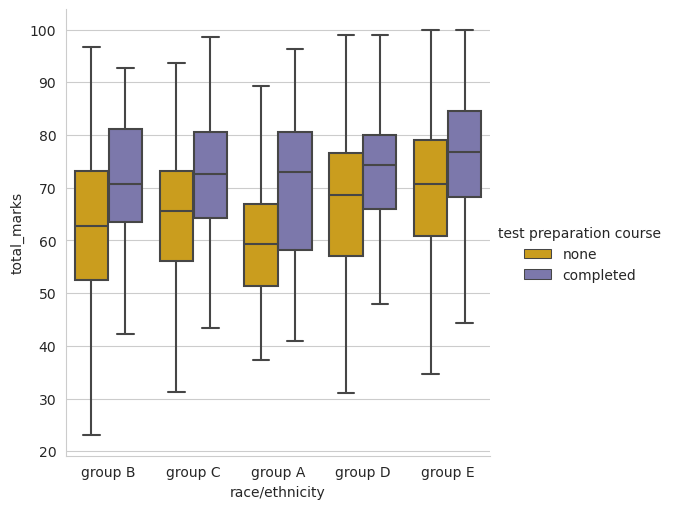

In [16]:
sns.catplot(x='race/ethnicity',y='total_marks',data =df,hue='test preparation course',palette='Dark2_r',kind='box',showfliers=False)
plt.show()

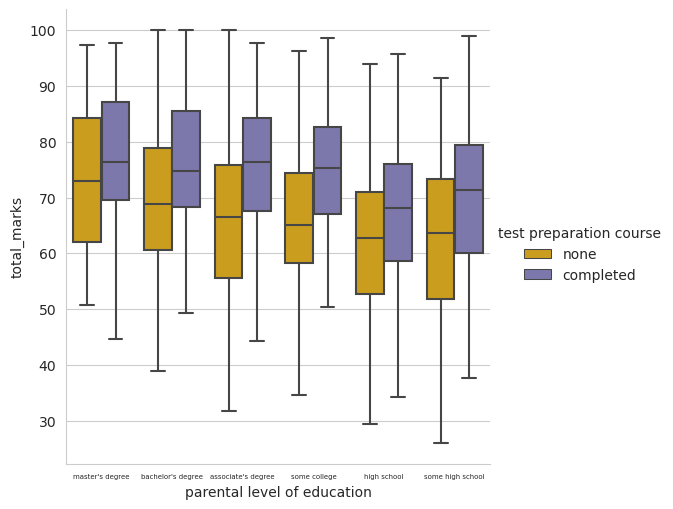

In [17]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 5
order = ["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"]
sns.catplot(x='parental level of education',y='total_marks',data =df,hue='test preparation course',order=order,palette='Dark2_r',kind='box',showfliers=False)
plt.show()

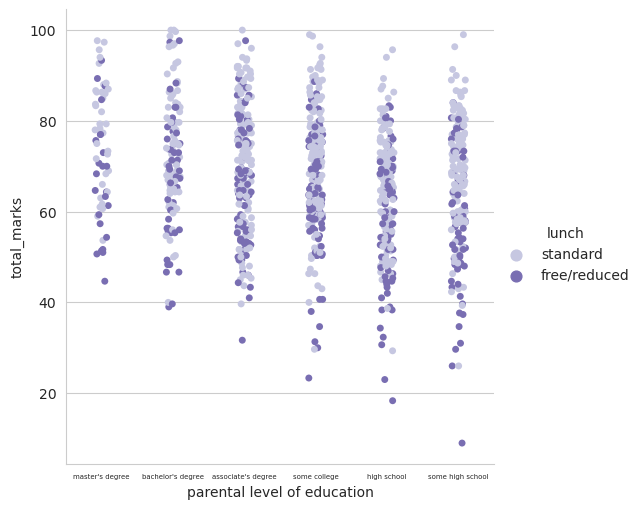

In [18]:
sns.catplot(x='parental level of education',y='total_marks',hue='lunch',data=df,order=order,palette='Purples')
plt.show()

In [19]:
mpl.rcParams.update(mpl.rcParamsDefault)

<H2>Some Conclusions</H2>
<ul>
<li>Student with standard lunch tend to score more on average</li>
<li>Student on group B scored lowest while student of group E scored highest</li>
<li>Student test prepartion is affected by parents education </li>
</ul>

# Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [21]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [22]:
df_model = df.drop(['math score','reading score','writing score'],axis=1)

In [23]:
y = df_model['total_marks']
df_model = df_model.drop('total_marks',axis=1)

In [24]:
df_model = pd.get_dummies(df_model)
df_model

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [1]:
x_train,y_train,x_test,y_test = train_test_split(df_model,y,test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

In [26]:
model = Ridge()
model.fit(x_train,x_test)
pred = model.predict(y_train)
train_pred = model.predict(x_train)
score =  mean_squared_error(y_test,pred,squared=False)
score

13.40336713053758

<h1>Feature importance plot</h1>

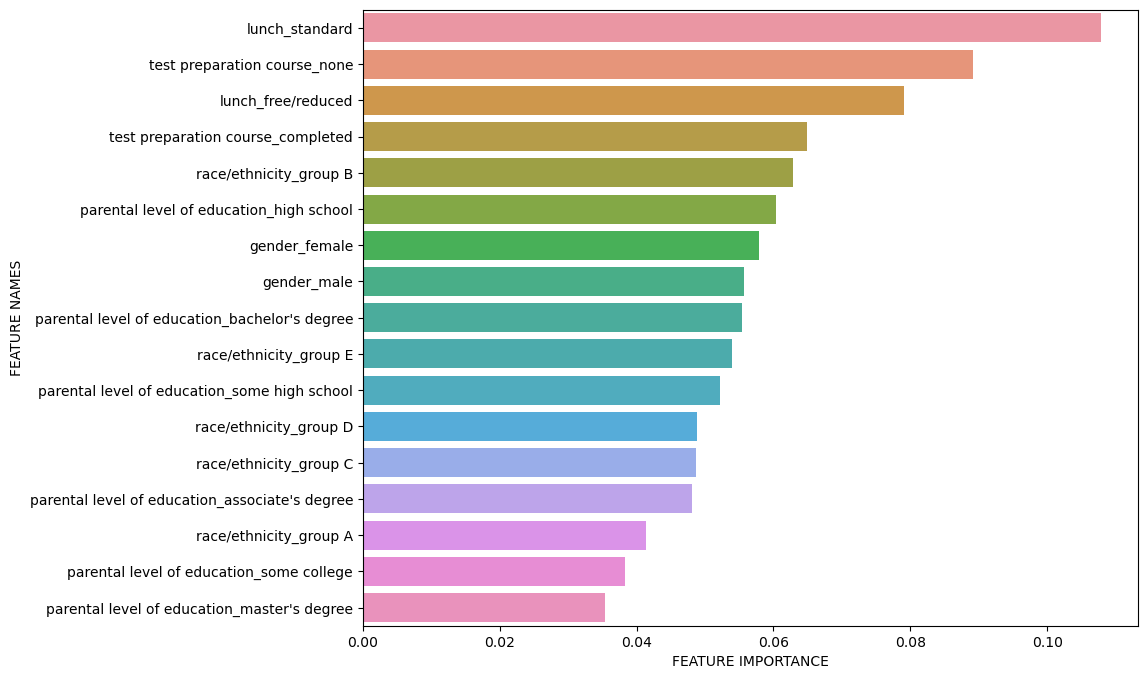

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,x_test)
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

In [1]:
pip install sweetviz


In [2]:
import pandas as pd
import sweetviz
data = pd.read_csv("StudentsPerformance.csv")
train = data.iloc[:1000]
test = data.iloc[1000:]
train.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
report = sweetviz.analyze (train)
report.show_html('report.html')


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
